# Single Dimension Test - Dynamic Dimension Support

This notebook demonstrates the system working with **only ONE dimension**.

## Configuration

We configure only one dimension:
```python
DIMENSION_COLUMNS = ['credit_score_band']
```

## What to Expect

- **4 segments** per lender-period (Excellent, Good, Fair, Poor)
- **Waterfall grid** with 2 charts visible (Overall + By Credit Score Band)
- Bottom row of waterfall grid hidden (no other dimensions)
- All calculations working correctly with single dimension

## Setup

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import symmetric_decomposition_calculator
import visualization_engine
import dimension_config

# Configure matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['figure.dpi'] = 100

## Configure for Single Dimension

Update the configuration to use only one dimension:

In [2]:
# Configure for single dimension
dimension_config.DIMENSION_COLUMNS = ['credit_score_band']

print("Configured Dimension Column Names:")
dimension_cols = dimension_config.get_dimension_columns()
for i, col in enumerate(dimension_cols, 1):
    print(f"  {i}. {col}")

print(f"\nNumber of dimensions: {len(dimension_cols)}")
print(f"Expected segments per lender-period: 4 (Excellent, Good, Fair, Poor)")

Configured Dimension Column Names:
  1. credit_score_band

Number of dimensions: 1
Expected segments per lender-period: 4 (Excellent, Good, Fair, Poor)


## Load Single-Dimension Data

In [3]:
# Load data with ONLY credit_score_band dimension
data_path = Path.cwd().parent / 'data' / 'funnel_data_one_dimension.csv'
df = pd.read_csv(data_path)
df['month_begin_date'] = pd.to_datetime(df['month_begin_date'])

print("Data Column Names:")
print(df.columns.tolist())

print(f"\nLoaded {len(df):,} rows")

print("\nDimension values in data:")
print(f"  Lenders: {', '.join(sorted(df['lender'].unique()))}")
print(f"  credit_score_band: {', '.join(sorted(df['credit_score_band'].unique()))}")

print(f"\nDate range: {df['month_begin_date'].min().date()} to {df['month_begin_date'].max().date()}")

# Verify segment count
segments_per_period = len(df[(df['lender']=='BANK_A') & (df['month_begin_date']=='2023-06-01')])
print(f"\nSegments per lender-period: {segments_per_period} ✓")

print("\nSample data:")
df.head(4)

Data Column Names:
['lender', 'month_begin_date', 'credit_score_band', 'num_tot_bks', 'num_tot_apps', 'pct_of_total_apps', 'str_apprv_rate', 'str_bk_rate', 'cond_apprv_rate', 'cond_bk_rate']

Loaded 288 rows

Dimension values in data:
  Lenders: BANK_A, BANK_B, BANK_C
  credit_score_band: Excellent, Fair, Good, Poor

Date range: 2023-01-01 to 2024-12-01

Segments per lender-period: 4 ✓

Sample data:


,lender,month_begin_date,credit_score_band,num_tot_bks,num_tot_apps,pct_of_total_apps,str_apprv_rate,str_bk_rate,cond_apprv_rate,cond_bk_rate
0,BANK_A,2023-01-01,Excellent,6379,17270,0.25,0.622488,0.673693,0.275772,0.568423
1,BANK_A,2023-01-01,Good,6379,17270,0.25,0.504159,0.449452,0.293793,0.425360
2,BANK_A,2023-01-01,Fair,6379,17270,0.25,0.419629,0.503992,0.303541,0.392024
3,BANK_A,2023-01-01,Poor,6379,17270,0.25,0.251111,0.423409,0.328610,0.344126


## Run Decomposition with Single Dimension

In [4]:
# Calculate decomposition
results = symmetric_decomposition_calculator.calculate_decomposition(
    df=df,
    date_a='2023-06-01',
    date_b='2024-06-01',
    lender='BANK_A'
)

print("Symmetric Decomposition Results:")
print(f"  Method: {results.metadata['method']}")
print(f"  Lender: {results.metadata['lender']}")
print(f"  Period 1: {results.metadata['date_a']}")
print(f"  Period 2: {results.metadata['date_b']}")
print(f"  Period 1 bookings: {results.metadata['period_1_total_bookings']:,.0f}")
print(f"  Period 2 bookings: {results.metadata['period_2_total_bookings']:,.0f}")
print(f"  Delta bookings: {results.metadata['delta_total_bookings']:+,.0f}")
print(f"  Number of segments: {results.metadata['num_segments']} ✓")

Symmetric Decomposition Results:
  Method: symmetric
  Lender: BANK_A
  Period 1: 2023-06-01
  Period 2: 2024-06-01
  Period 1 bookings: 4,335
  Period 2 bookings: 6,929
  Delta bookings: +2,594
  Number of segments: 4 ✓


/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: 2594.36, Actual change: 2594.00
  warnings.warn(


In [5]:
# View summary
print("Decomposition Summary:")
results.summary

Decomposition Summary:


,effect_type,booking_impact
0,volume_effect,1656.879107
1,mix_effect,0.000000
2,str_approval_effect,126.874062
3,cond_approval_effect,485.693240
4,str_booking_effect,163.928063
5,cond_booking_effect,157.676847
6,interaction_effect,3.313026
7,total_change,2594.364345


## Segment Detail - Single Dimension Only

In [6]:
# Show segment detail - notice only ONE dimension column!
print("Segment Detail Column Names (first 10):")
print(results.segment_detail.columns.tolist()[:10])

print("\nAll 4 segments:")
results.segment_detail[['credit_score_band', 
                        'period_1_segment_bookings', 
                        'period_2_segment_bookings',
                        'total_effect']]

Segment Detail Column Names (first 10):
['credit_score_band', 'period_1_date', 'period_1_total_apps', 'period_1_pct_of_total', 'period_1_segment_apps', 'period_1_str_apprv_rate', 'period_1_str_bk_rate', 'period_1_cond_apprv_rate', 'period_1_cond_bk_rate', 'period_1_segment_bookings']

All 4 segments:


,credit_score_band,period_1_segment_bookings,period_2_segment_bookings,total_effect
0,Excellent,1429.065515,2456.398537,1027.333021
1,Good,1412.321466,2072.951764,660.630298
2,Fair,883.564365,1393.549996,509.985630
3,Poor,610.655554,1007.070949,396.415395


## Waterfall Grid - Adaptive Layout

The grid should show:
- **Top-left**: Overall aggregate waterfall
- **Top-right**: By Credit Score Band
- **Bottom row**: Hidden (no other dimensions)

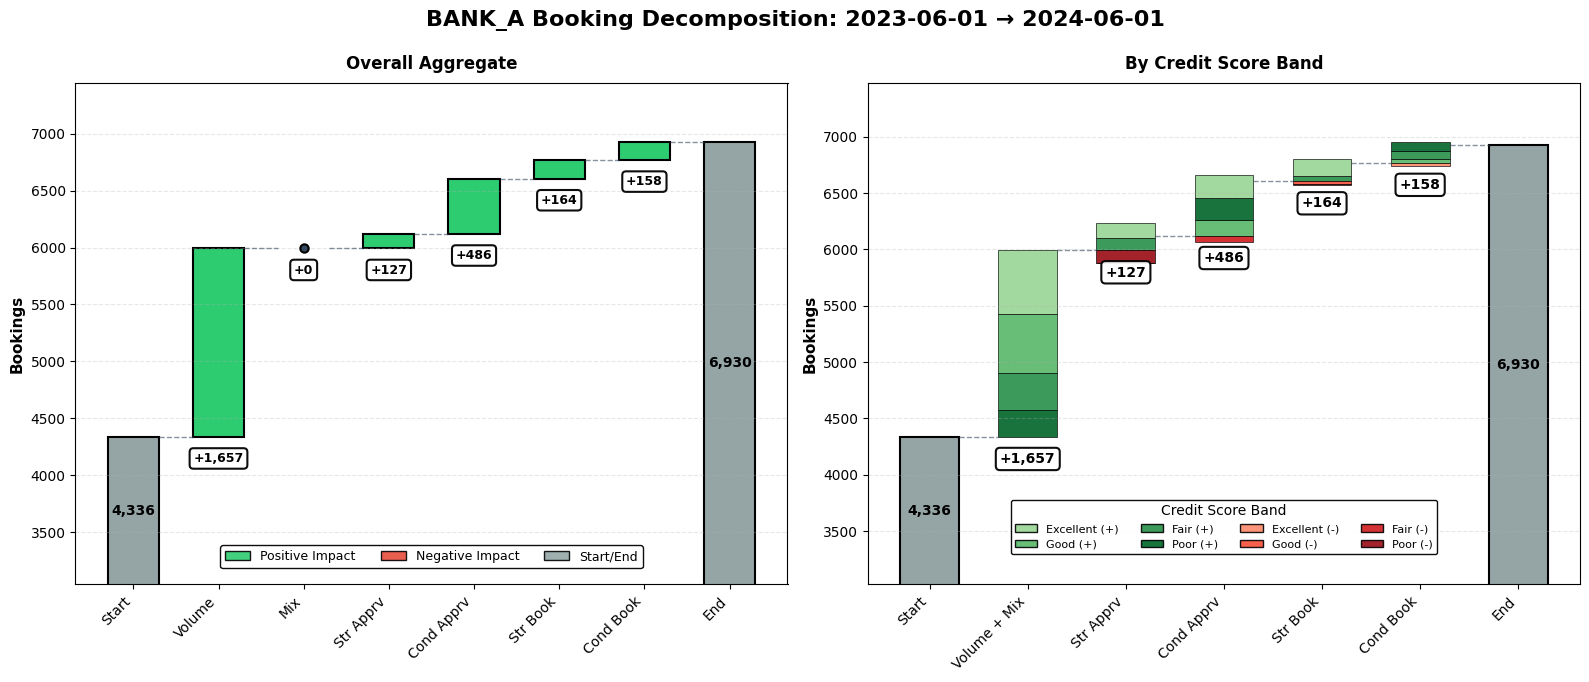


✓ Waterfall grid created with 2 visible charts, 2 hidden
  - Top-left: Overall Aggregate
  - Top-right: By Credit Score Band
  - Bottom-left: (hidden)
  - Bottom-right: (hidden)


In [7]:
# Create waterfall grid - should show only 2 charts
fig = visualization_engine.create_waterfall_grid(
    summary=results.summary,
    segment_detail=results.segment_detail,
    lender='BANK_A'
)

plt.show()

print("\n✓ Waterfall grid created with 2 visible charts, 2 hidden")
print("  - Top-left: Overall Aggregate")
print("  - Top-right: By Credit Score Band")
print("  - Bottom-left: (hidden)")
print("  - Bottom-right: (hidden)")

## Dimension Drilldown - Single Dimension

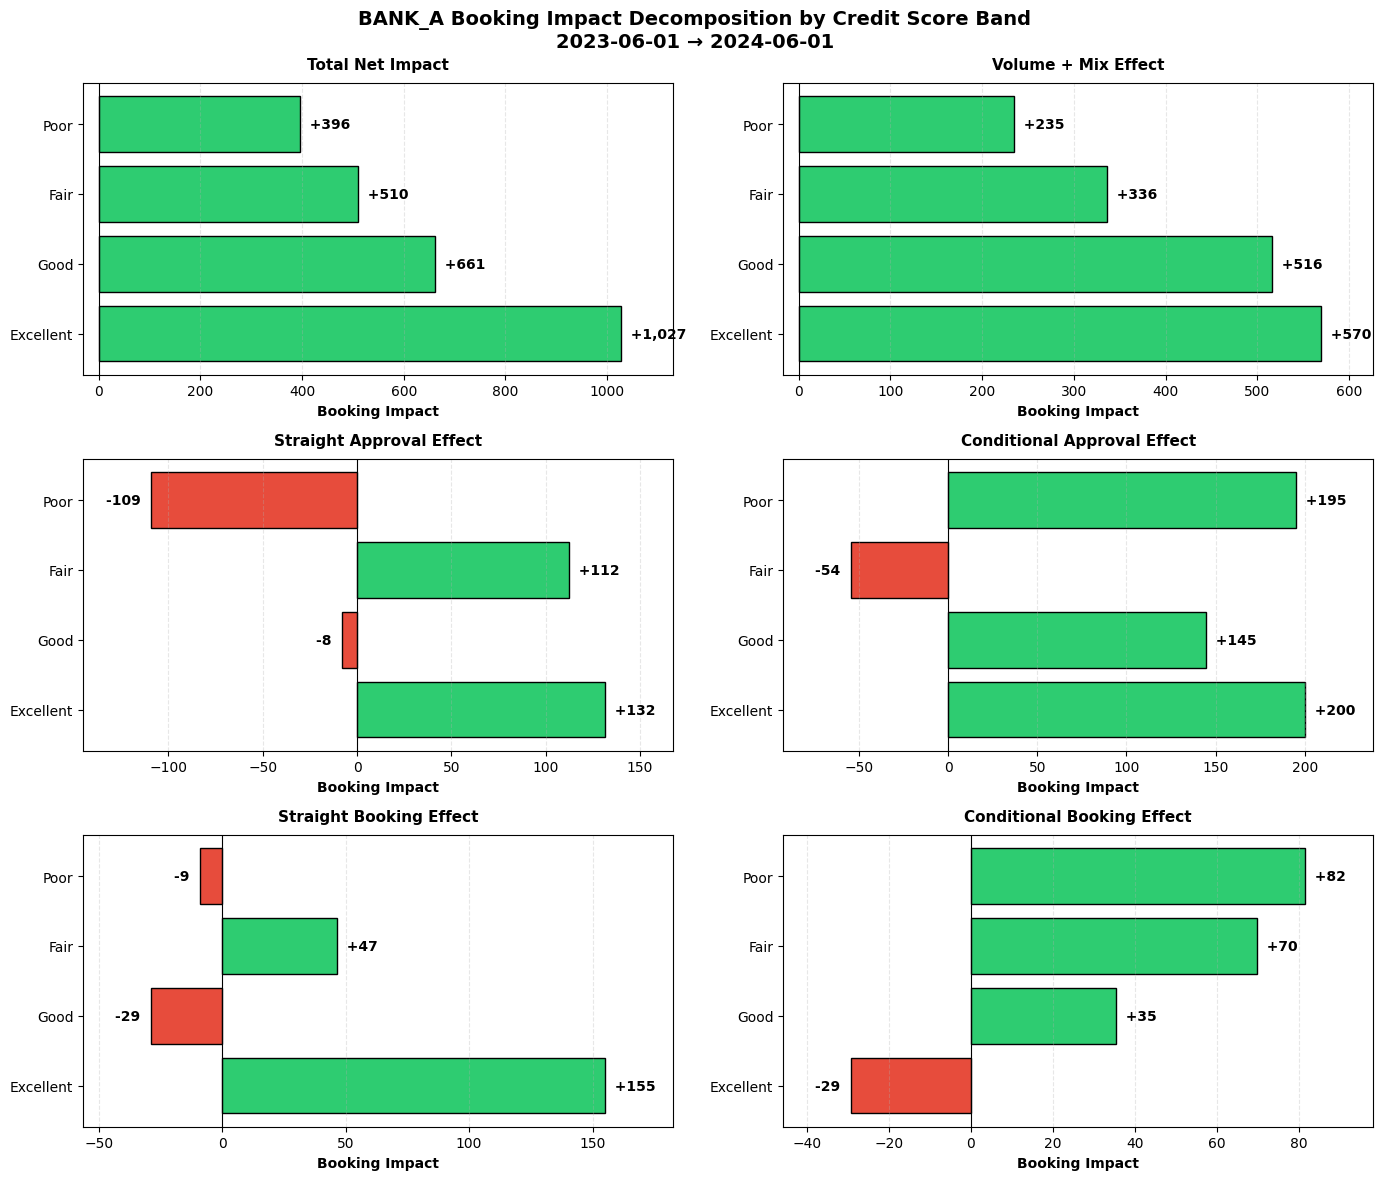

In [8]:
# Create drilldown for the single dimension
fig_drill = visualization_engine.create_dimension_drilldown(
    segment_detail=results.segment_detail,
    dimension='credit_score_band',
    lender='BANK_A'
)

plt.show()

## Multi-Lender Analysis with Single Dimension

In [9]:
# Multi-lender decomposition
results_multi = symmetric_decomposition_calculator.calculate_multi_lender_decomposition(
    df=df,
    date_a='2023-06-01',
    date_b='2024-06-01',
    lenders=['BANK_A', 'BANK_B', 'BANK_C']
)

print("Multi-Lender Results:")
print(f"  Lenders: {results_multi.metadata['lenders']}")
print(f"  Aggregate delta: {results_multi.metadata['aggregate_delta_bookings']:+,.0f}")

print("\nAggregate Summary:")
results_multi.aggregate_summary

Calculating decomposition for BANK_A...
Calculating decomposition for BANK_B...
Calculating decomposition for BANK_C...
Multi-Lender Results:
  Lenders: ['BANK_A', 'BANK_B', 'BANK_C']
  Aggregate delta: -741

Aggregate Summary:


/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: 2594.36, Actual change: 2594.00
  warnings.warn(
/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: -1283.84, Actual change: -1284.00
  warnings.warn(
/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: -2050.19, Actual change: -2051.00
  warnings.warn(


,effect_type,booking_impact
0,volume_effect,-1237.358717
1,mix_effect,0.000000
2,str_approval_effect,699.540016
3,cond_approval_effect,251.509016
4,str_booking_effect,-140.323108
5,cond_booking_effect,-314.345509
6,interaction_effect,1.309117
7,total_change,-739.669185


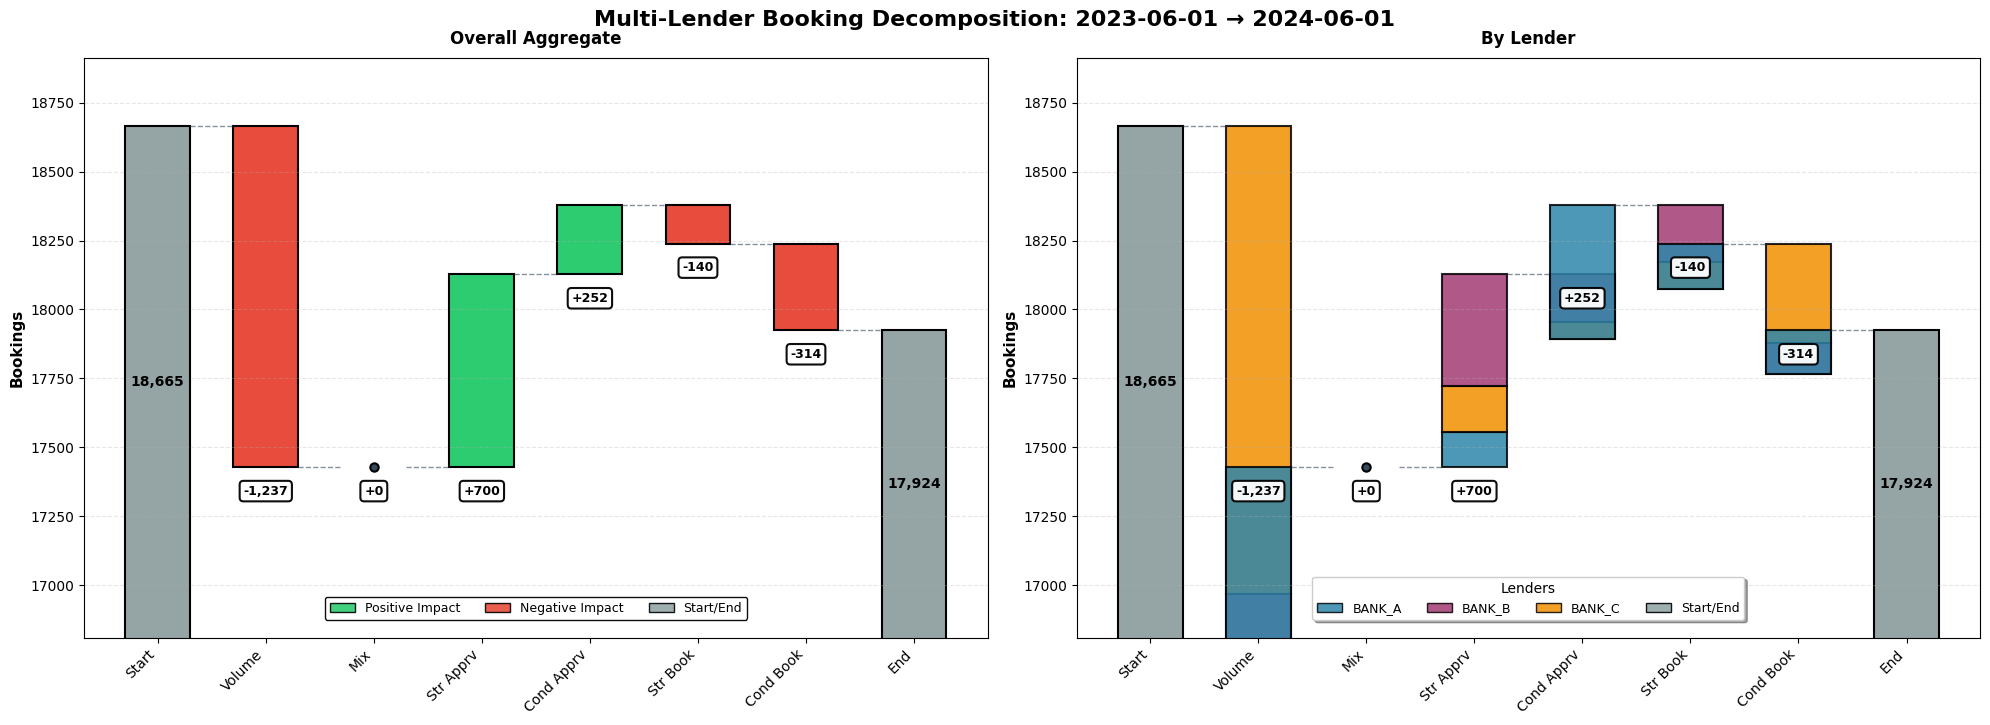

In [10]:
# Multi-lender waterfall
fig_multi = visualization_engine.create_lender_waterfall_grid(
    lender_summaries=results_multi.lender_summaries,
    aggregate_summary=results_multi.aggregate_summary,
    metadata=results_multi.metadata
)

plt.show()

---

## Summary - Single Dimension Success!

### What We Demonstrated

✅ **Single dimension configuration** works perfectly  
✅ **4 segments** per lender-period (Excellent, Good, Fair, Poor)  
✅ **Decomposition calculations** working correctly  
✅ **Waterfall grid** adapts layout (2 charts visible, 2 hidden)  
✅ **Dimension drilldown** works with single dimension  
✅ **Multi-lender analysis** functional  
✅ **Segment detail** contains only the configured dimension  

### Key Insight

The system automatically adapts to **any number of dimensions (1, 2, or 3)** by:
- Reading dimension names from `dimension_config.py`
- Validating only configured dimensions
- Creating visualizations based on available dimensions
- Hiding unused chart positions

**No code changes required** - just update the config!

In [11]:
# Reset to 3 dimensions for other notebooks
dimension_config.DIMENSION_COLUMNS = ['credit_score_band', 'competitiveness_tier', 'product_type']
print("✓ Reset to 3 dimensions")

✓ Reset to 3 dimensions
